# Machine Learning Introduction: Handwritten Digits

### WIP - Unfinished!!!

In [3]:
import sklearn
import numpy as np
from sklearn import (linear_model, datasets, metrics)
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [4]:
#Gathering Dataset
digits = datasets.load_digits()

data = digits.data
image_label = digits.target
range = digits.target_names

Before embedding shape was: (1797, 64).
After embedding shape is: (1797, 2).


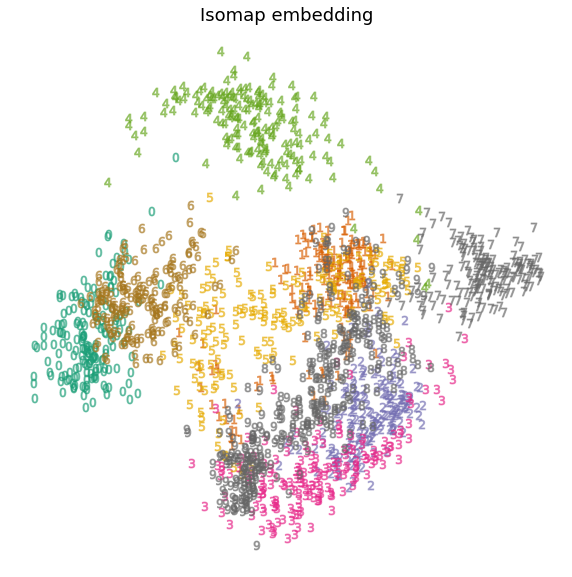

In [5]:
#Dimensionality reduction with Isomap -> Unsupervised Learning
embedding = Isomap(n_neighbors=20, n_components=2)
reduced_data = embedding.fit_transform(data)
print('Before embedding shape was: {}.\nAfter embedding shape is: {}.'.format(data.shape, reduced_data.shape))

fig, ax = plt.subplots(figsize=(10,10))

for digit in digits.target_names:
    ax.scatter(
        *reduced_data[digits.target == digit].T,
        marker=f"${digit}$",
        s=80,
        color=plt.cm.Dark2(digit),
        alpha=0.5,
        zorder=2,
    )

ax.set_title('Isomap embedding', fontsize=18)
ax.set_axis_off()
#plt.colorbar(mappable=digits, ax=ax)
plt.show()

Before embedding shape was: (1797, 64).
After embedding shape is: (1797, 2).


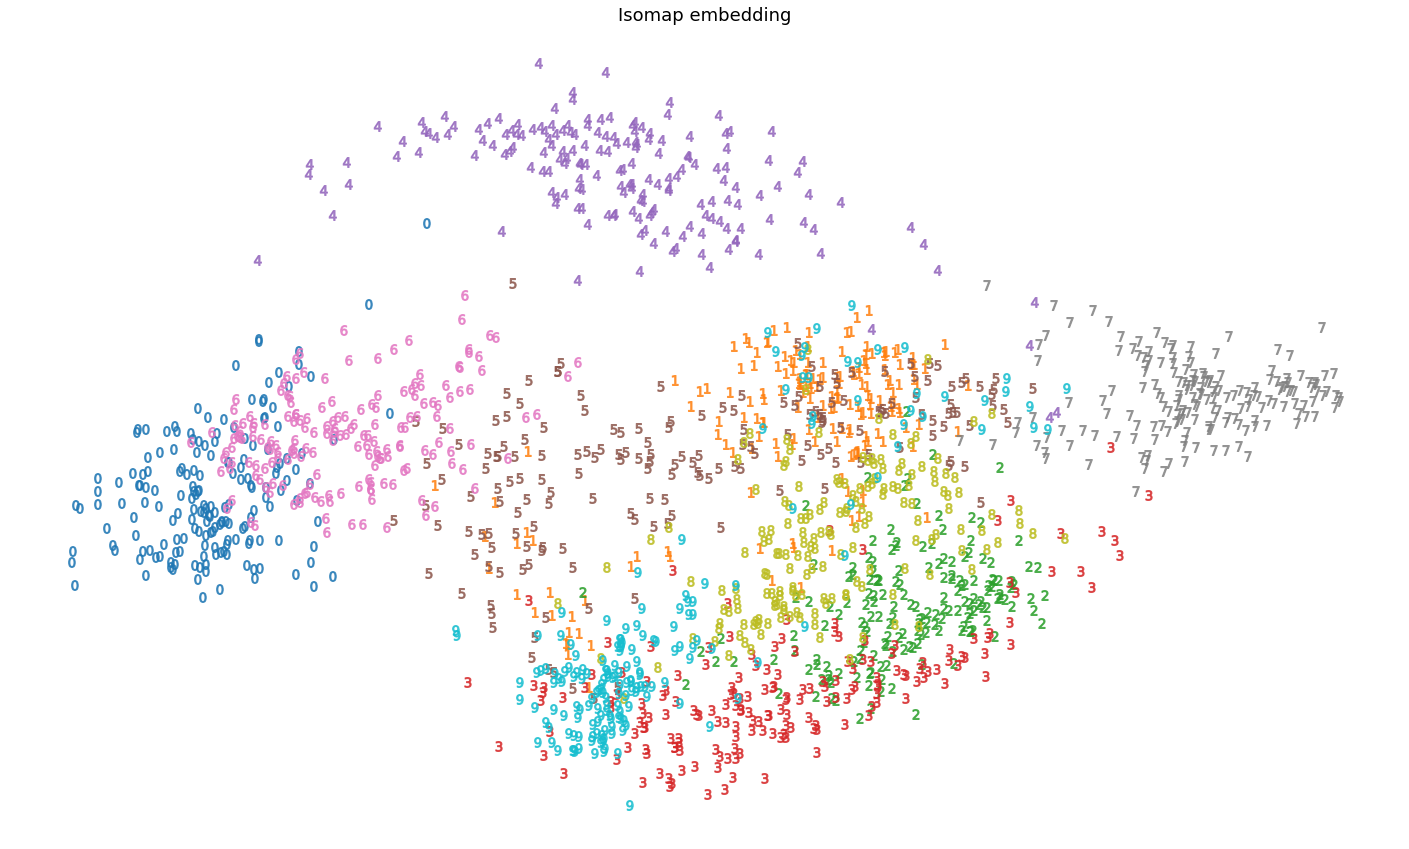

In [12]:
#Dimensionality reduction with Isomap -> Unsupervised Learning
embedding = Isomap(n_neighbors=20, n_components=2)
reduced_data = embedding.fit_transform(data)
print('Before embedding shape was: {}.\nAfter embedding shape is: {}.'.format(data.shape, reduced_data.shape))

fig, ax = plt.subplots(figsize=(25,15))

for digit in digits.target_names:
    ax.scatter(
        *reduced_data[digits.target == digit].T,
        marker=f"${digit}$",
        s=100,
        alpha=0.75,
        zorder=2,
    )

ax.set_title('Isomap embedding', fontsize=18)
ax.set_axis_off()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on classification is: 0.9506


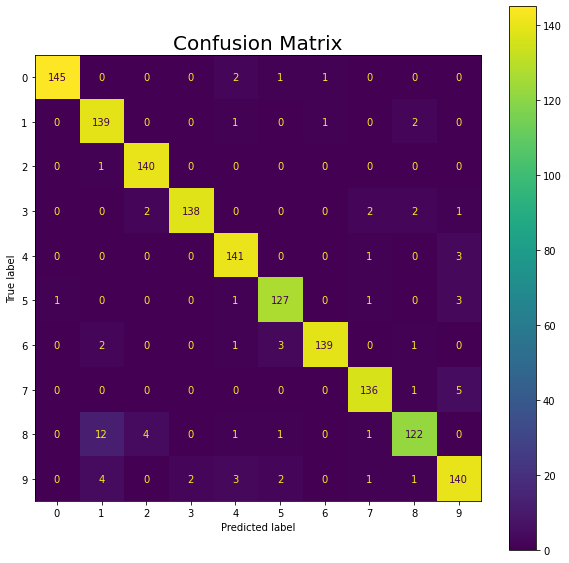

In [6]:
# .2 Classification with linear regression -> Supervised Learning

#Assigning a model
model = linear_model.LogisticRegression(solver='sag')

#Split data into training and test with a test size of 80% of samples
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size = 0.8)

#Train the model with the digits on the training subset
model.fit(X_train, y_train)

#Predict the value of the digit on the non-trained test subset
#Prediction comes from trained model!
y_predicted = model.predict(X_test)

#Accuracy score -> the dimensionalities must match!
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print('Accuracy on classification is: {:.4f}'.format(accuracy))

#Computing the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

#Pretty plotting
fig, ax = plt.subplots(figsize=(10, 10))
display = metrics.ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)
display.ax_.set_title('Confusion Matrix', fontsize=20)
plt.show()